<div style="text-align: center;">
    <img src="https://mejores.com/wp-content/uploads/2020/08/Universidad-Tecnica-Federico-Santa-Maria.jpg" title="Title text" width="20%" height="20%" />
</div>



<hr style="height:2px;border:none"/>
<h1 align='center'> Evaluacion Modulo 3 </h1>

<H3 align='center'> Procesamiento y Visualización de datos </H3>
<H4 align='center'> Pablo Gonzalez - 2025 </H4>
<hr style="height:2px;border:none"/>


**Objetivos:**
  * Selección y Exploración del Conjunto de Datos
  * Preprocesamiento de Datos
  * Análisis Descriptivo
  * Visualización de Datos
  
<hr style="height:2px;border:none"/>

## 1.- Selección y Exploración del Conjunto de Datos:**
### Elige uno de los siguientes conjuntos de datos:
* Skin Cancer ISIC: Imágenes de piel con y sin cáncer de piel. Enlace a Kaggle
* ECG Heartbeat Categorization Dataset: Series de tiempo con señales de ECG. Enlace a Kaggle
* ### Medical Appointment No Shows: Tabla con información de pacientes que no asisten a citas médicas. Enlace a Kaggle (Informacion Seleccionada!) ###
### Realiza una exploración inicial del conjunto de datos elegido:
### Carga los datos en Jupyter Notebook.
### Examina su estructura (columnas, tipos de datos, valores faltantes, etc.).


In [1]:
#RESPUESTA
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline
#Carga de Datos
df = pd.read_csv('../../data/evaluacion_mod_3/KaggleV2-May-2016.csv')
#Examinacion de dimensiones de la informacion
display(df.shape)
#Primera visualizacion de datos
df.head()


(110527, 14)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
#Descripcion de tipos de datos por columna de la data
df.info()
#Datos nulos por columna
df_nulos=df.isnull()
display(df_nulos.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Documenta el conjunto de datos: describe qué tipo de datos contiene y qué información es relevante para el análisis. (destaco lo mas importante y al final la columna no-show como el objetivo del estudio)

### RESPUESTA

* #### PatientId: (Dato Numerico) Identificador único del paciente (Importante si se desea saber cumplimiento por paciente, ya que puede repetirse si el paciente tiene varias citas).
* AppointmentID: (Dato Numerico) Identificador único de la cita.
* #### Gender: (Texto M ó F) Género del paciente: “F” (femenino) o “M” (masculino).
* ScheduledDay:	(Fecha)	Fecha y hora en que se programó la cita.
* AppointmentDay: (fecha)	Día en que debía realizarse la cita. Se puede obtener informacion si ambas fechas se complementan.
* #### Age: (Dato Numerico) Edad del paciente.
* Neighbourhood: (Texto) Barrio o zona de residencia. Es posible usarlo pero requiere tratamiento si hay coincidencias.
* #### Scholarship: (Dato Numerico) tiene ayuda (1) o no (0). Segun documentacion se refiere a ayuda social del gobierno brasileño.
* #### Hipertension:	(Dato Numerico) paciente tiene hipertensión (1) o no (0).
* #### Diabetes: (Dato Numerico) si tiene diabetes(1) o no (0).
* #### Alcoholism: (Dato Numerico) si tiene antecedentes de alcoholismo (1) o no (0).
* #### Handcap: (Dato Numerico)	Nivel de discapacidad (de 0 a 4).
* #### SMS_received: (Dato Numerico) Si el paciente recibió un SMS recordatorio (1), o no (0).
* #### No-show: (Texto) Variable objetivo que indica si paciente "No se presentó": “No”  asistió, “Yes” no asistió. Es un poco confuso este dato pero lo aclaran en la discusion de la data.

### Variables Categóricas y tratamiento a considerar
| Variable | Tipo de Variable (Estadística) | Codificación para ML |
| :--- | :--- | :--- |
| **Gender** | Nominal (M/F) | One-Hot Encoding |
| **Scholarship** | Nominal (Booleana) | Ya está codificada (0/1) |
| **Hipertension** | Nominal (Booleana) | Ya está codificada (0/1) |
| **Diabetes** | Nominal (Booleana) | Ya está codificada (0/1) |
| **Alcoholism** | Nominal (Booleana) | Ya está codificada (0/1) |
| **SMS\_received** | Nominal (Booleana) | Ya está codificada (0/1) |
| **Handcap** | Ordinal/Nominal | One-Hot Encoding (se recomienda si los niveles no son incrementales) |
| **No-show** (Objetivo) | Nominal (Binaria) | Label Encoding (Convertir 'No' a 0 y 'Yes' a 1) |

In [3]:
#Obtencion de estadisticas basicas
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# Contar el número total de citas por cada paciente, 
# mas que nada para ver si se repiten, se ordenan de manera descendente
cuenta_citas_x_paciente = df.groupby('PatientId').size().reset_index(name='Total_Citas')
display(cuenta_citas_x_paciente.sort_values(by='Total_Citas', ascending=False))
#print(conteo_citas.sort_values(by='Total_Citas', ascending=False).head())

,PatientId,Total_Citas
59336,8.221459e+14,88
2840,9.963767e+10,84
30055,2.688613e+13,70
31569,3.353478e+13,65
60232,8.713749e+14,62
...,...,...
25807,9.886985e+12,1
25808,9.887131e+12,1
25811,9.887668e+12,1
25813,9.888132e+12,1


In [5]:
# Contar el número total de citas por barrio, 
# mas que nada para ver si se repiten, se ordenan de manera descendente
cuenta_citas_x_barrio = df.groupby('Neighbourhood').size().reset_index(name='Total_Citas')
display(cuenta_citas_x_barrio.sort_values(by='Total_Citas', ascending=False))
#print(conteo_citas.sort_values(by='Total_Citas', ascending=False).head())

,Neighbourhood,Total_Citas
38,JARDIM CAMBURI,7717
43,MARIA ORTIZ,5805
59,RESISTÊNCIA,4431
39,JARDIM DA PENHA,3877
36,ITARARÉ,3514
...,...,...
31,ILHA DO BOI,35
32,ILHA DO FRADE,10
0,AEROPORTO,8
34,ILHAS OCEÂNICAS DE TRINDADE,2


In [6]:
# Se desprende ademas que existen edades -1 que deben regularizarse, ese paciente llego!
df[df["Age"]==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## 2.-Preprocesamiento de Datos:
### Realiza las siguientes tareas de preprocesamiento en el conjunto de datos:
* #### Limpieza de datos: Elimina o imputa los valores faltantes.
* #### Normalización de los datos (si aplica): Justifica tu elección sobre la técnica de normalización (por ejemplo, normalización min-max, estandarización, etc.).

In [7]:
#limpio el dato de la edad con -1
df_clean = df.copy()
df_clean.replace({"Age": -1}, 0, inplace=True)
#imprimimos lo limpiado
df_clean[df_clean["Age"]==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [8]:
# se analizan las columnas con null y no se encuentran
df_nulos=df.isnull()
display(df_nulos.sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#eliminare la variable de vecindad por ahora ya que me genera muchas columnas en la normalizacion
df_clean = df_clean.drop('Neighbourhood', axis=1)

In [10]:
# Revisamos las columnas de tipo numericas
df_numericos = df_clean.select_dtypes(include=['number'])
#Dimensiones de sub dataframe con valores numericos
display(df_numericos.shape)


(110527, 9)

In [11]:
#Solo la columna edad modificaremos por ahora
df_clean['Age'].describe()


count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [12]:
#la distancia entre min y max es bastante para usar la normalizacion min-max, se usara z-score o estandarizacion
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dato_2_estandarizar = df_clean[['Age']]
df_clean['Age'] = scaler.fit_transform(dato_2_estandarizar)
print(df_clean.shape)
df_clean.head()

(110527, 13)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,1.077933,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0.818306,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,1.077933,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,-1.258709,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0.818306,0,1,1,0,0,0,No


In [13]:
#procedo a normalizar las variables no-show, gender y handcap
# Aplico One-Hot Encoding para Variables Predictoras Categóricas, como las Columnas: Género, Discapacidad y No-show
variables = ['Gender', 'Handcap','No-show']#ojo que en la ultima columna el 0 corresponde a No (es decir que asistio)

# El drop_first=True es para evitar multicolinealidad, es decir no se creara una tercera columna asociada a gender por ejemplo, en OHE
df_clean = pd.get_dummies(df_clean, columns=variables, drop_first=True)

print(f"\nDimensiones del DataFrame después de codificar: {df_clean.shape}")
df_clean.head()


Dimensiones del DataFrame después de codificar: (110527, 16)


,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4,No-show_Yes
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,1.077933,0,1,0,0,0,False,False,False,False,False,False
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0.818306,0,0,0,0,0,True,False,False,False,False,False
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,1.077933,0,0,0,0,0,False,False,False,False,False,False
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,-1.258709,0,0,0,0,0,False,False,False,False,False,False
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0.818306,0,1,1,0,0,False,False,False,False,False,False


In [14]:
# Convertir (True→1, False→0)
bool_cols = df_clean.select_dtypes(include='bool').columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)
df_clean.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4,No-show_Yes
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,1.077933,0,1,0,0,0,0,0,0,0,0,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0.818306,0,0,0,0,0,1,0,0,0,0,0
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,1.077933,0,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,-1.258709,0,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0.818306,0,1,1,0,0,0,0,0,0,0,0


In [15]:
#a pesar de no tener pensado considerar la diferencia de fechas, tambien obtendremos este dato. 
#Sabremos lo que demorara en que lo atiendan desde que pidio la hora
#Convertir las columnas de fecha a formato datetime
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])

#Extraer el número de días enteros de la diferencia
df_clean['Dias_Espera'] = (df_clean['AppointmentDay'] - df_clean['ScheduledDay']).dt.days

#Corregir valores negativos a 0 días de espera. loc busca en todas las filas que cumplen la condicion, 
#luego indicamos con Dias Espera que a esa columna se la asignara el 0 si se cumple la condicion.
df_clean.loc[df_clean['Dias_Espera'] < 0, 'Dias_Espera'] = 0

#Aprovechamos de estandarizar
scaler_espera = StandardScaler()
df_clean['Dias_Espera_Estandarizado'] = scaler_espera.fit_transform(df_clean[['Dias_Espera']])

#Eliminar columnas innecesarias
df_clean = df_clean.drop(['Dias_Espera','ScheduledDay', 'AppointmentDay'], axis=1, errors='ignore')
df_clean.head()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4,No-show_Yes,Dias_Espera_Estandarizado
0,2.987250e+13,5642903,1.077933,0,1,0,0,0,0,0,0,0,0,0,-0.634346
1,5.589978e+14,5642503,0.818306,0,0,0,0,0,1,0,0,0,0,0,-0.634346
2,4.262962e+12,5642549,1.077933,0,0,0,0,0,0,0,0,0,0,0,-0.634346
3,8.679512e+11,5642828,-1.258709,0,0,0,0,0,0,0,0,0,0,0,-0.634346
4,8.841186e+12,5642494,0.818306,0,1,1,0,0,0,0,0,0,0,0,-0.634346


## 3.- Análisis Descriptivo:
* ## Realiza un análisis descriptivo de los datos, que puede incluir:
    * ### Cálculo de estadísticas básicas (media, mediana, desviación estándar, etc.).
    * ### Análisis de distribuciones de las variables relevantes.
    * ### Identificación de posibles correlaciones entre variables (si aplica).
* ## Documenta y detalla tus hallazgos. Si encuentras patrones o tendencias importantes, asegúrate de explicarlos claramente.

## 4.- Visualización de Datos:
* ## Crea visualizaciones para representar los siguientes aspectos:
    * ### Un gráfico para explorar la distribución de las variables (histograma, boxplot, etc.).
    * ### Un gráfico para analizar la relación entre las variables (diagrama de dispersión, gráfico de correlación, etc.).
    * ### Un gráfico adicional que resuma otro hallazgo importante del análisis (según el tipo de datos que estás trabajando).
* ## Descripción: Acompaña cada gráfico con una breve descripción que explique qué muestra y por qué es relevante para el análisis.

In [16]:
#Estadisticas para el tercer punto
# Mostrar floats con un máximo de 2 decimales y deshabilitar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
df_clean.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4,No-show_Yes,Dias_Espera_Estandarizado
count,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00
mean,147496265710394.06,5675305.12,0.00,0.10,0.20,0.07,0.03,0.32,0.35,0.02,0.00,0.00,0.00,0.20,-0.00
std,256094920291738.84,71295.75,1.00,0.30,0.40,0.26,0.17,0.47,0.48,0.13,0.04,0.01,0.01,0.40,1.00
min,39217.84,5030230.00,-1.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.63
25%,4172614444192.00,5640285.50,-0.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.63
50%,31731838713978.00,5680573.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.43
75%,94391720898175.00,5725523.50,0.78,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.30
max,999981631772427.00,5790484.00,3.37,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,11.21


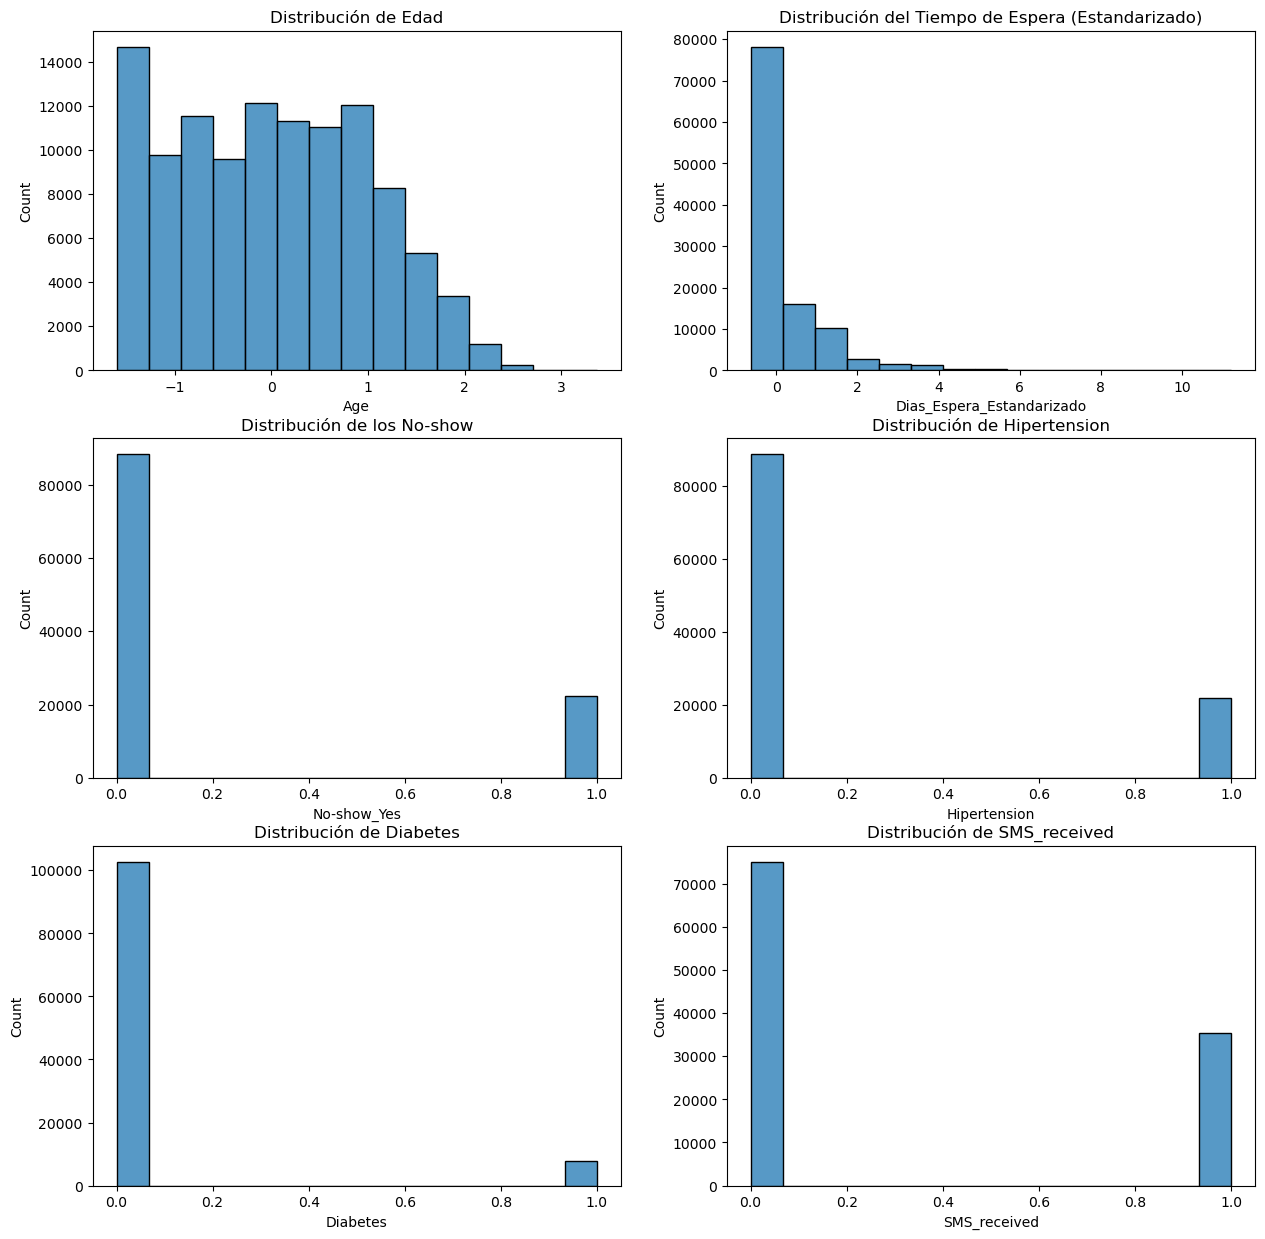

In [17]:
#Analisis de las variables mas reelevantes
plt.figure(figsize=(15, 15))

#Histograma de Edad
plt.subplot(321)
sns.histplot(df_clean['Age'], bins=15, kde=False) 
plt.title("Distribución de Edad")

#Histograma de Dias de espera estandarizado
plt.subplot(322)
sns.histplot(df_clean['Dias_Espera_Estandarizado'],kde=False, bins=15)
plt.title("Distribución del Tiempo de Espera (Estandarizado)")

#Histograma de No Show
plt.subplot(323)
sns.histplot(df_clean['No-show_Yes'],kde=False, bins=15)
plt.title("Distribución de los No-show")

#Histograma de Hipertension
plt.subplot(324)
sns.histplot(df_clean['Hipertension'],kde=False, bins=15)
plt.title("Distribución de Hipertension")

#Histograma de Diabetes
plt.subplot(325)
sns.histplot(df_clean['Diabetes'],kde=False, bins=15)
plt.title("Distribución de Diabetes")

#Histograma de SMS_received
plt.subplot(326)
sns.histplot(df_clean['SMS_received'],kde=False, bins=15)
plt.title("Distribución de SMS_received")

plt.show()

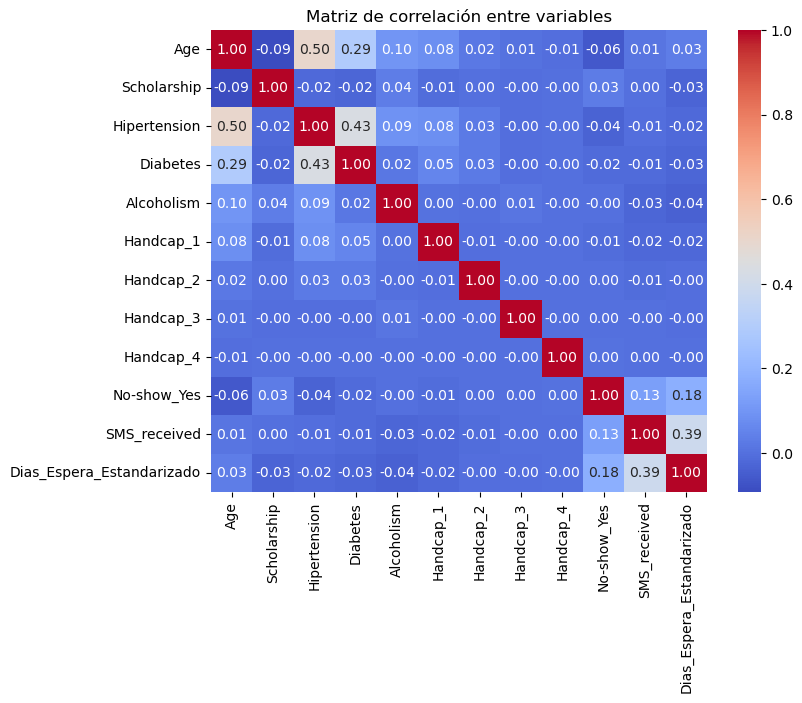

In [18]:
#Grafico para identificar correlaciones
plt.figure(figsize=(8, 6))
variables_numericas = ['Age','Scholarship','Hipertension','Diabetes',
                       'Alcoholism','Handcap_1','Handcap_2','Handcap_3',
                       'Handcap_4','No-show_Yes','SMS_received','Dias_Espera_Estandarizado']

sns.heatmap(df_clean[variables_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Matriz de correlación entre variables")

plt.show()

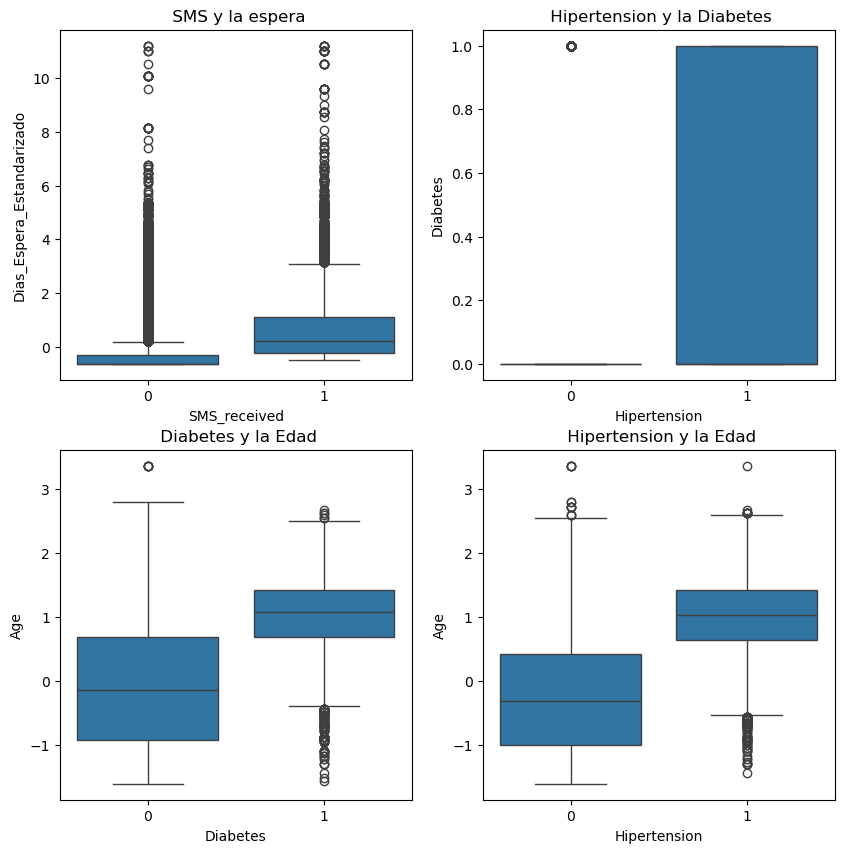

In [19]:
#Usa sns.boxplot() para comparar las algunas variables de correlacion
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.boxplot(x='SMS_received', y='Dias_Espera_Estandarizado', data=df_clean)
plt.title(" SMS y la espera")

plt.subplot(222)
sns.boxplot(x='Hipertension', y='Diabetes', data=df_clean)
plt.title(" Hipertension y la Diabetes")

plt.subplot(223)
sns.boxplot(x='Diabetes', y='Age', data=df_clean)
plt.title(" Diabetes y la Edad")

plt.subplot(224)
sns.boxplot(x='Hipertension', y='Age', data=df_clean)
plt.title(" Hipertension y la Edad")

plt.show()

## Respuestas para consultas del tercer y cuarto punto
* ### Respecto del histograma de edad, se desprende de que la mayoria se encuentra cercano al promedio.
* ### Respecto del histograma de Dias de Espera, no hubo gran espera por lo que se visualiza. Pero si hay outliers importantes a considerar.
* ### Los casos de inasistencia son minorias segun el histograma de no-show
* ### Respecto de los histogramas de diabetes e hipertension se desprende que la mayoria no poseen estas enfermedades.
* ### sobre el ultimo histograma de SMS, se ve que la mayoria no recibio el SMS pero la minoria (a pesar de la diferencia), no deja de ser importante.
* ### El grafico de correlacion indica que entre el SMS y la espera hay relacion, al igual que entre la diabetes y la hipertension. Lo mismo con la edad y la hipertension, al igual que la edad y la diabetes. A mas edad da la impresion que aparecen estas enfermedades.
* ### Respecto del boxplot de sms vs espera, se desprende que a mayor espera sera enviado el SMS como recordatorio
* ### Los pacientes con Hipertensión tienen una probabilidad mucho mayor de también tener Diabetes. El Box Plot confirma que cuando la Hipertension es 1, la Diabetes casi siempre también es 1.
* ### Sobre los dos ultimos dos graficos, se desprende que a mayor edad se puede presentar la diabetes e hipertension. Tal como se ve en las cajas asociadas al grupo 1 de ambos graficos.